In [3]:
%matplotlib inline
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.cm
import sys
sys.path.insert(0,'../')
%load_ext autoreload
%autoreload 2
from utils import citibike_helpers
from utils.gspan import gSpan
import numpy as np
import pandas as pd  #requirement comes with anaconda
import datetime 
from datetime import datetime as dt
import seaborn as sns
import operator
import networkx as nx
from datetime import timedelta

import community #requires separate install -  pip install python-louvain
import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


In [4]:
inputfile="../datasets/citibike/201701-citibike-tripdata.csv.gz"
df = citibike_helpers.load_citibike_data(inputfile)
df = citibike_helpers.calculate_trip_durations_citibike(df)
#Here we focus on a subset of "interesting" trips with duration between 5 and 120 minutes.
subset_trips=df[(df['Trip Duration Minutes']>5) & (df['Trip Duration Minutes']<120)]
subset_trips.sort_values('Start Time',inplace=True)
subset_trips['Start Time'] = pd.DatetimeIndex(subset_trips['Start Time'])
subset_trips.head(2)

,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender,Trip Duration Minutes
0,00:11:20,2017-01-01 00:00:21,2017-01-01 00:11:41,3226,W 82 St & Central Park West,40.782750,-73.971370,3165,Central Park West & W 72 St,40.775794,-73.976206,25542,Subscriber,1965.0,2,11.333333
1,00:21:23,2017-01-01 00:00:45,2017-01-01 00:22:08,3263,Cooper Square & E 7 St,40.729236,-73.990868,498,Broadway & W 32 St,40.748549,-73.988084,21136,Subscriber,1987.0,2,21.383333


In [5]:
unique_start_stations=citibike_helpers.get_unique_column_values(subset_trips,'Start Station ID')
unique_end_stations=citibike_helpers.get_unique_column_values(subset_trips,'End Station ID')
station_ids=set(unique_start_stations).union(set(unique_end_stations))
station2id = {v:k for k,v in enumerate(station_ids)}

# gSpan
We first need to turn our data to a format that gSpan algorithm understands. To do so, we use the following helper function and pass our filtered data to it. This function generates a new file in "../datasets/citibike/" directory, in which we can later on use to run the gSpan algorithm. The helper function generates one graph for each time interval that is set for time variable (in hours) making our graph dataset to have 120 graphs.

In [6]:
directed = False
time = 6
citibike_helpers.generate_gspan_citibike(subset_trips, station2id, directed, time)

We use the gSpan algorithm that is implemented in "https://github.com/betterenvi/gSpan". The following cell shows the input parameter for the gSpan algorithm. We are using the minimum support of 12, meaning each subgraph should at least happen 12 times in our graph dataset, and we set a lower bound on the number of nodes for each subgraph to be 18.

Please note that, this algorithm will take a lot of time to process given the size of the citibike dataset.

In [7]:
database_file_name = '../datasets/citibike/gspan_undirected_6.data'
min_support = 12
lower_bound_of_num_vertices = 18
verbose = False
directed = False
plot = True
where = True

gs = gSpan(
    database_file_name=database_file_name,
    min_support=min_support,
    min_num_vertices=lower_bound_of_num_vertices,
    is_undirected=(not directed),
    verbose=verbose,
    visualize=plot,
    where=where
)

subgraph number 0
Name: 
Type: Graph
Number of nodes: 18
Number of edges: 17
Average degree:   1.8889

Support: 12


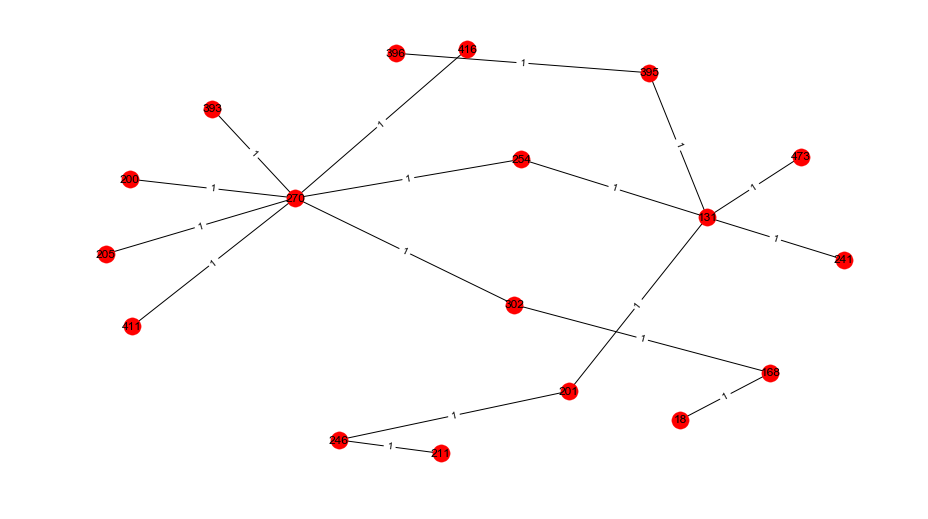

where: [65, 97, 121, 69, 101, 9, 73, 105, 45, 13, 17, 89]

-----------------

subgraph number 1
Name: 
Type: Graph
Number of nodes: 18
Number of edges: 17
Average degree:   1.8889

Support: 12


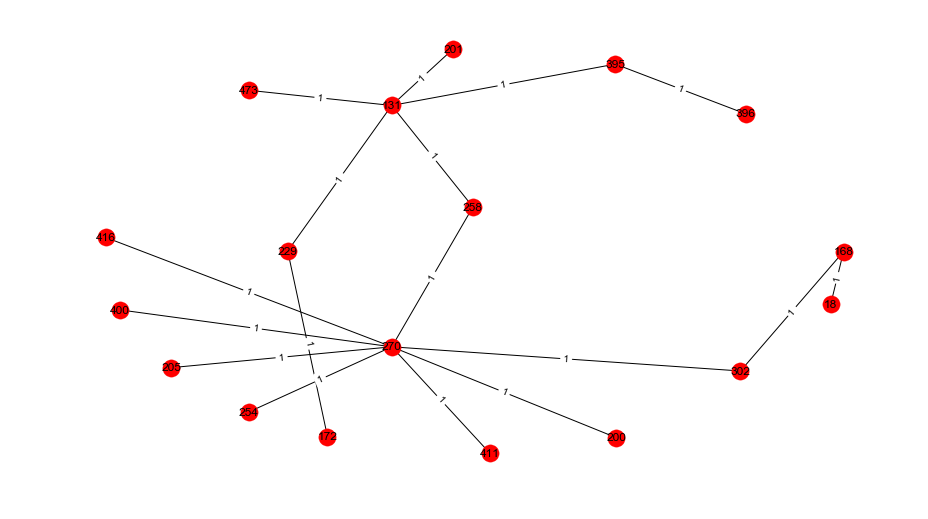

where: [65, 97, 69, 9, 41, 73, 105, 45, 13, 77, 17, 89]

-----------------

subgraph number 2
Name: 
Type: Graph
Number of nodes: 18
Number of edges: 17
Average degree:   1.8889

Support: 12


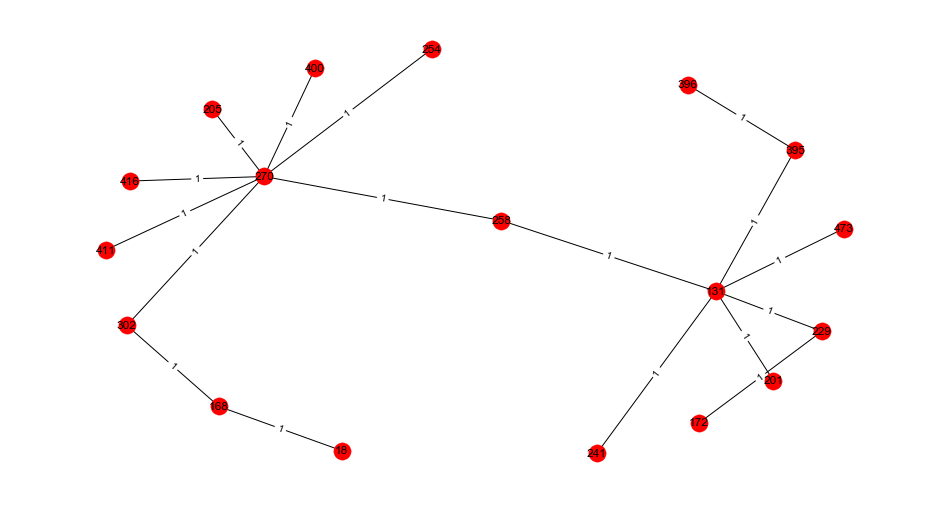

where: [65, 97, 69, 9, 41, 73, 105, 45, 13, 77, 17, 89]

-----------------

subgraph number 3
Name: 
Type: Graph
Number of nodes: 18
Number of edges: 17
Average degree:   1.8889

Support: 12


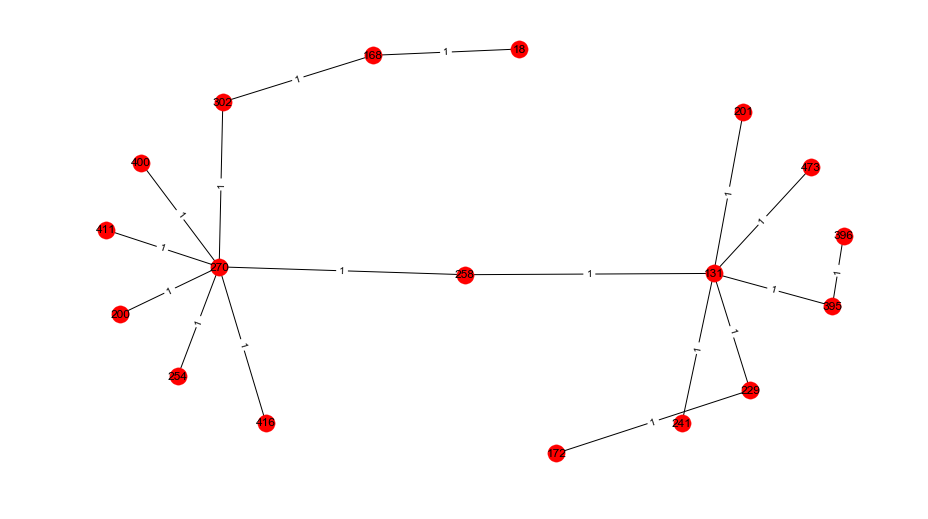

where: [65, 97, 69, 9, 41, 73, 105, 45, 13, 77, 17, 89]

-----------------

subgraph number 4
Name: 
Type: Graph
Number of nodes: 18
Number of edges: 17
Average degree:   1.8889

Support: 12


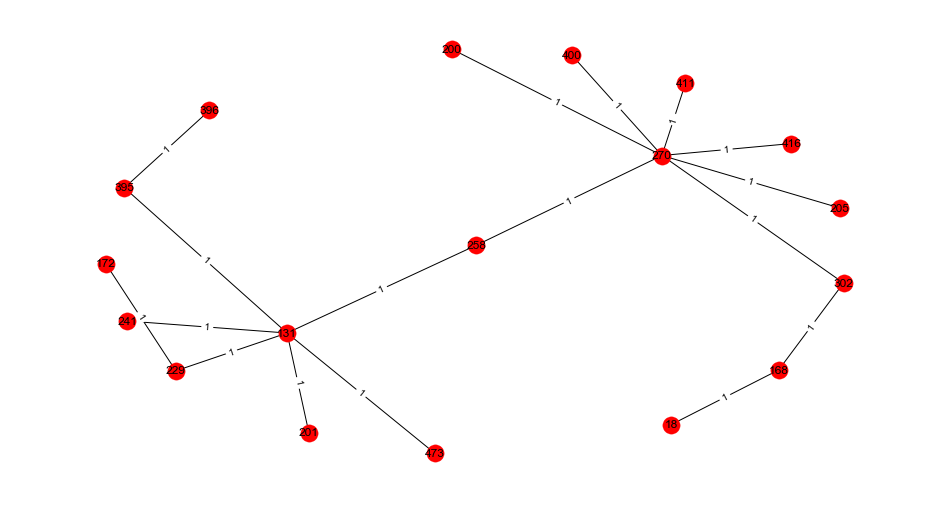

where: [65, 97, 69, 9, 41, 73, 105, 45, 13, 77, 17, 89]

-----------------

subgraph number 5
Name: 
Type: Graph
Number of nodes: 18
Number of edges: 17
Average degree:   1.8889

Support: 12


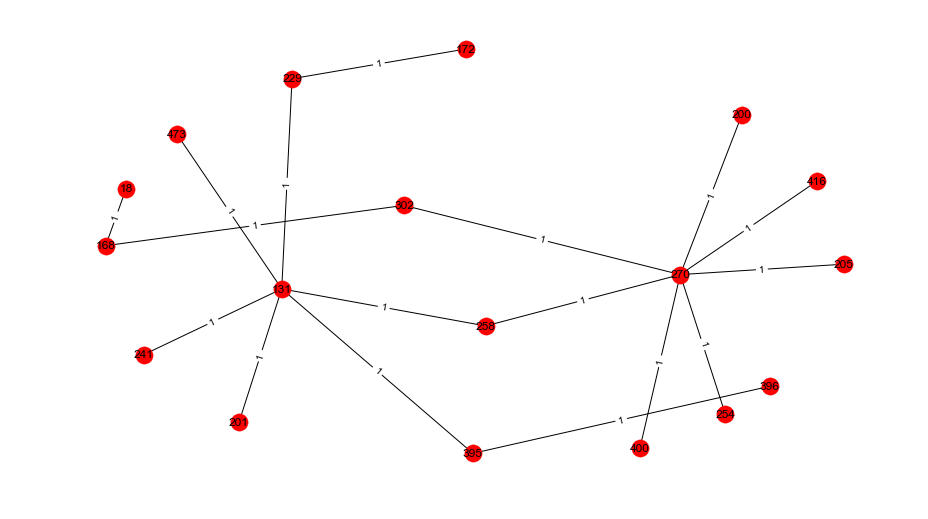

where: [65, 97, 69, 9, 41, 73, 105, 45, 13, 77, 17, 89]

-----------------

subgraph number 6
Name: 
Type: Graph
Number of nodes: 18
Number of edges: 17
Average degree:   1.8889

Support: 12


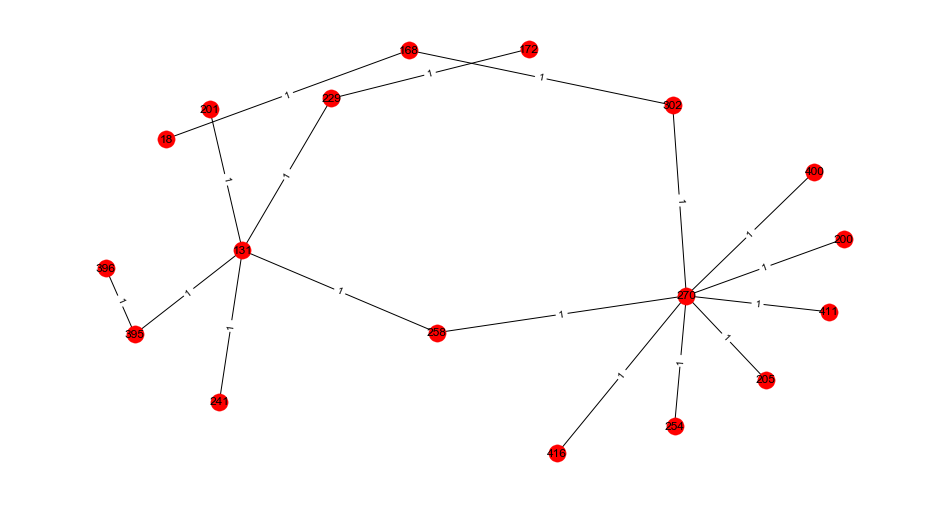

where: [65, 97, 69, 9, 41, 73, 105, 45, 13, 77, 17, 89]

-----------------

subgraph number 7
Name: 
Type: Graph
Number of nodes: 19
Number of edges: 18
Average degree:   1.8947

Support: 12


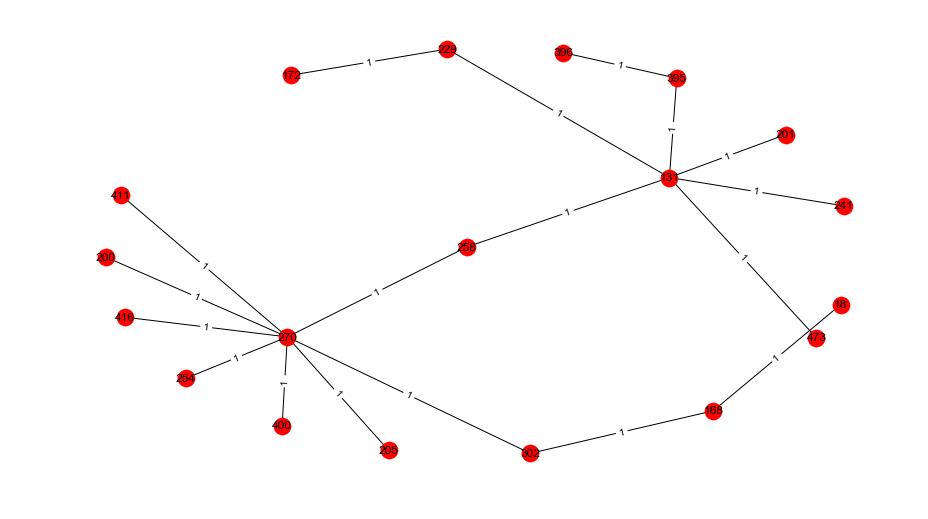

where: [65, 97, 69, 9, 41, 73, 105, 45, 13, 77, 17, 89]

-----------------

subgraph number 8
Name: 
Type: Graph
Number of nodes: 18
Number of edges: 17
Average degree:   1.8889

Support: 12


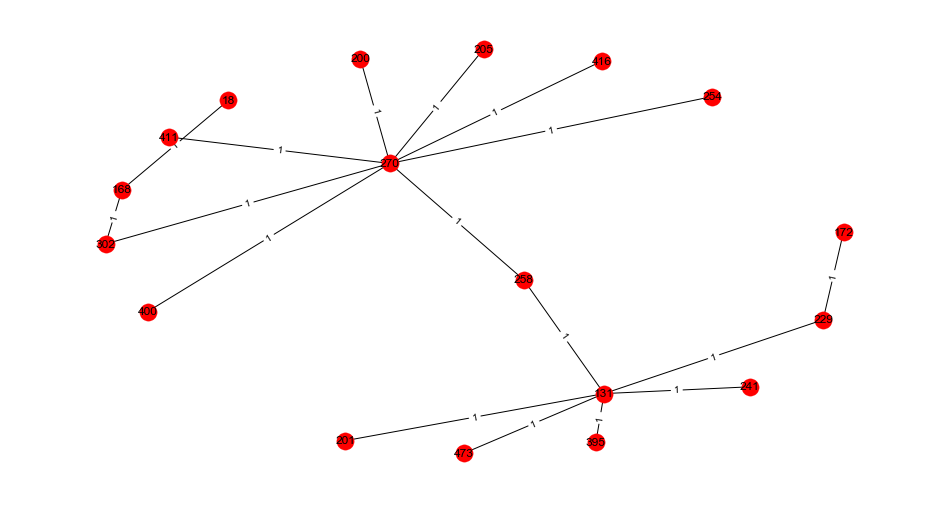

where: [65, 97, 69, 9, 41, 73, 105, 45, 13, 77, 17, 89]

-----------------

subgraph number 9
Name: 
Type: Graph
Number of nodes: 18
Number of edges: 17
Average degree:   1.8889

Support: 12


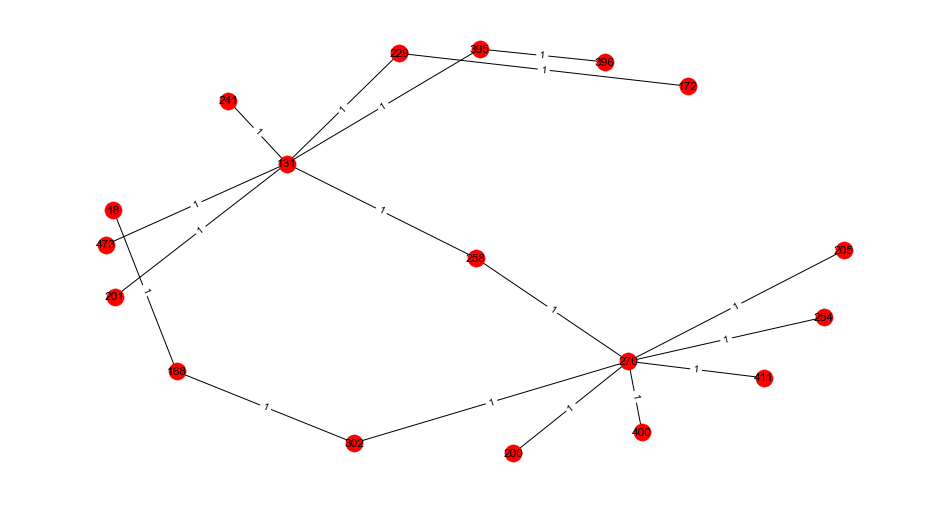

where: [65, 97, 69, 9, 41, 73, 105, 45, 13, 77, 17, 89]

-----------------

subgraph number 10
Name: 
Type: Graph
Number of nodes: 18
Number of edges: 17
Average degree:   1.8889

Support: 12


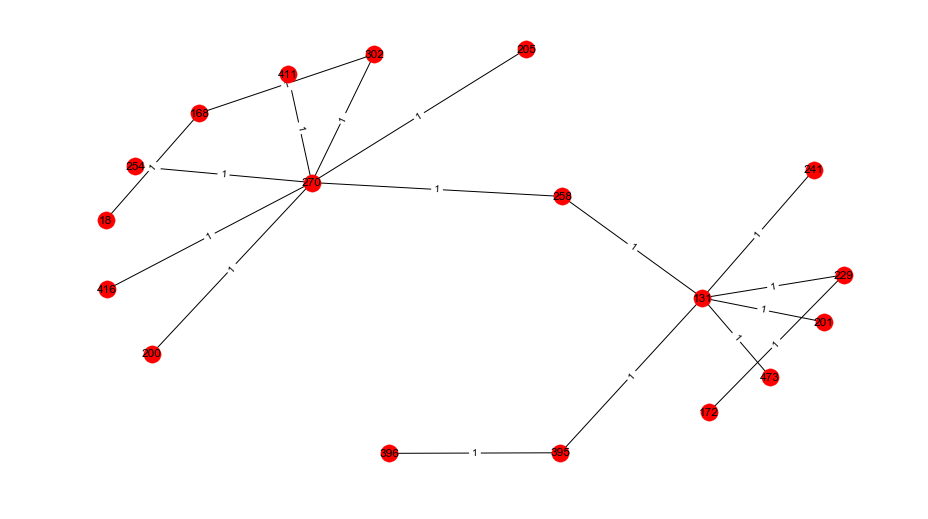

where: [65, 97, 69, 9, 41, 73, 105, 45, 13, 77, 17, 89]

-----------------

subgraph number 11
Name: 
Type: Graph
Number of nodes: 18
Number of edges: 17
Average degree:   1.8889

Support: 12


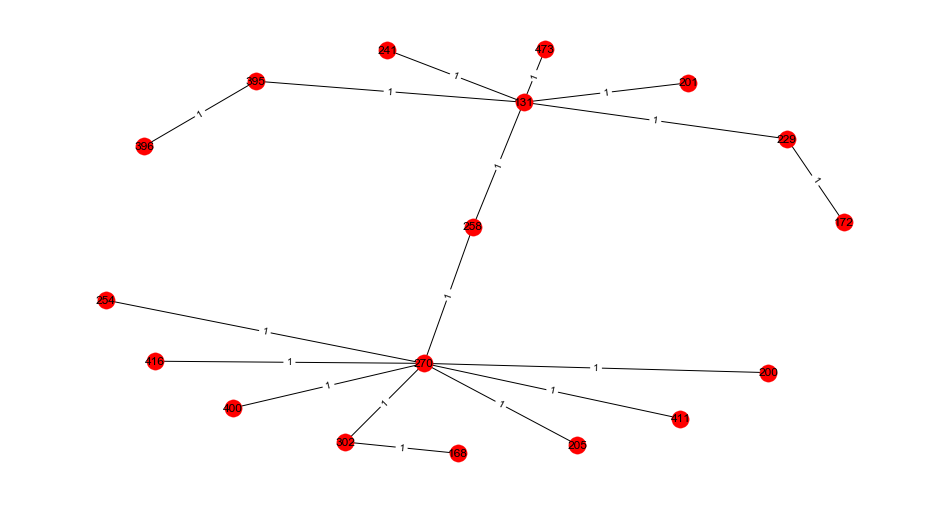

where: [65, 97, 69, 9, 41, 73, 105, 45, 13, 77, 17, 89]

-----------------

subgraph number 12
Name: 
Type: Graph
Number of nodes: 18
Number of edges: 17
Average degree:   1.8889

Support: 12


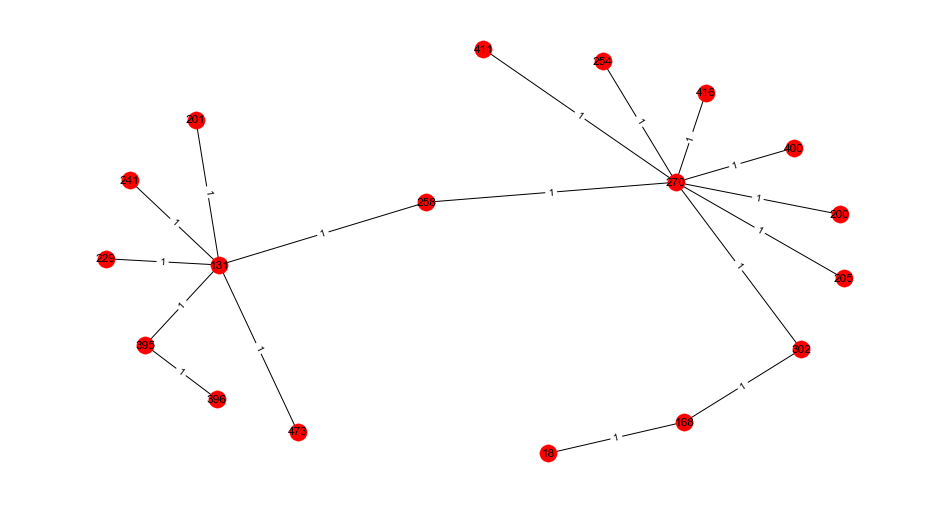

where: [65, 97, 69, 9, 41, 73, 105, 45, 13, 77, 17, 89]

-----------------

subgraph number 13
Name: 
Type: Graph
Number of nodes: 18
Number of edges: 17
Average degree:   1.8889

Support: 12


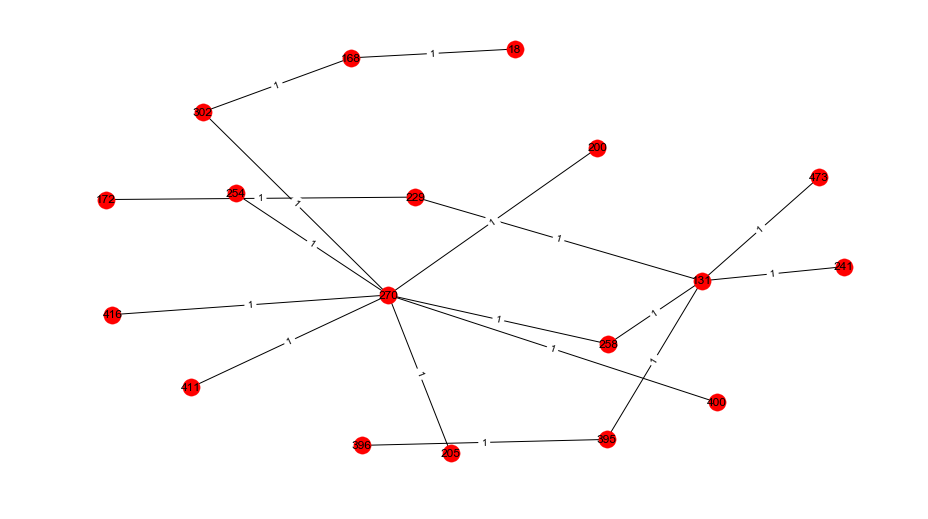

where: [65, 97, 69, 9, 41, 73, 105, 45, 13, 77, 17, 89]

-----------------

Read:	8.55 s
Mine:	7816.679999999999 s
Total:	7825.23 s


In [14]:
gs.run()
gs.time_stats()

In [8]:
for g in gs.graphs.values():
    g.plot()